<a href="https://colab.research.google.com/github/yndtky/AIdatascience/blob/main/keras_%E7%94%BB%E5%83%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(0, 5)] for mon in range(1, 13)])

In [ ]:
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

In [ ]:
x = tf.placeholder(tf.float32, [None, 5])

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
# データをTensorFlowのテンソルに変換
x = tf.constant(train_x, dtype=tf.float32)
t = tf.constant(train_t, dtype=tf.float32)

In [ ]:
w = tf.Variable(tf.zeros([5,1]))

In [ ]:
y = tf.matmul(x, w)

In [ ]:
x.shape

TensorShape([12, 5])

In [ ]:
loss = tf.reduce_sum(tf.square(y-t))

In [ ]:
train_step = tf.train.AdamOptimizer().minimize(loss)

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

In [ ]:
# モデルの構築
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(5,))
])

# コンパイル（Adamオプティマイザーを使用）
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

# モデルの訓練
model.fit(train_x_tensor, train_t_tensor, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14375672.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 14307189.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 14238875.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 14170733.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 14102759.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14034965.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13967348.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13899917.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13832667.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13765607.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13698732.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13632051.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13565565.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13499275.000

In [ ]:
import numpy as np
from numpy .random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20190220)
tf.random.set_seed(20190220)

In [ ]:
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [ ]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,), name='logistic_regression'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ logistic_regression (Dense)          │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_x, train_t, batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - acc: 0.4286 - loss: 1.1250
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.4286 - loss: 1.1154
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - acc: 0.4286 - loss: 1.1059
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4286 - loss: 1.0965
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.4286 - loss: 1.0871
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.4286 - loss: 1.0777
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - acc: 0.4286 - loss: 1.0685
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.4286 - loss: 1.0593
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.4286 - loss: 1.0501
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.4286 - loss: 1.0411


In [ ]:
history = model.fit(train_x, train_t, batch_size=len(train_x), epochs=5000, verbose=0)

<Axes: >

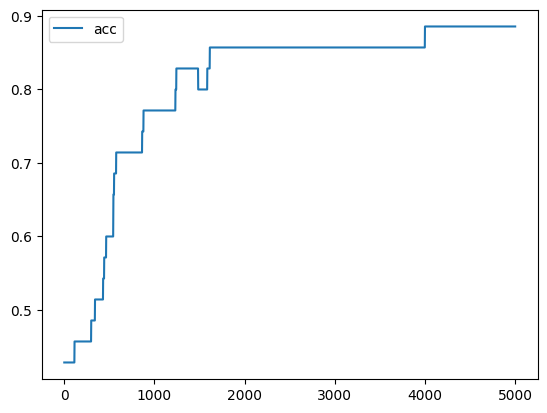

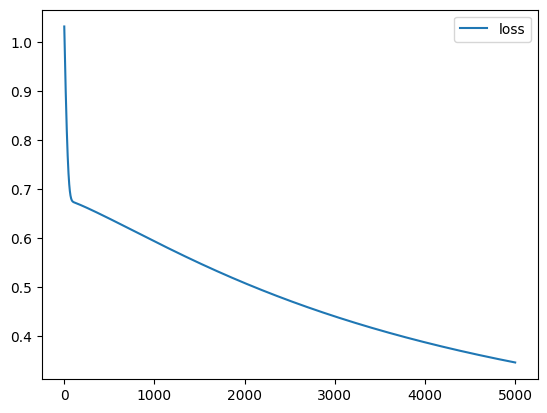

In [ ]:
DataFrame({'acc':history.history['acc']}).plot()
DataFrame({'loss':history.history['loss']}).plot()

In [ ]:
model.get_weights()

[array([[0.14283328],
        [0.14226958]], dtype=float32),
 array([-3.8992307], dtype=float32)]

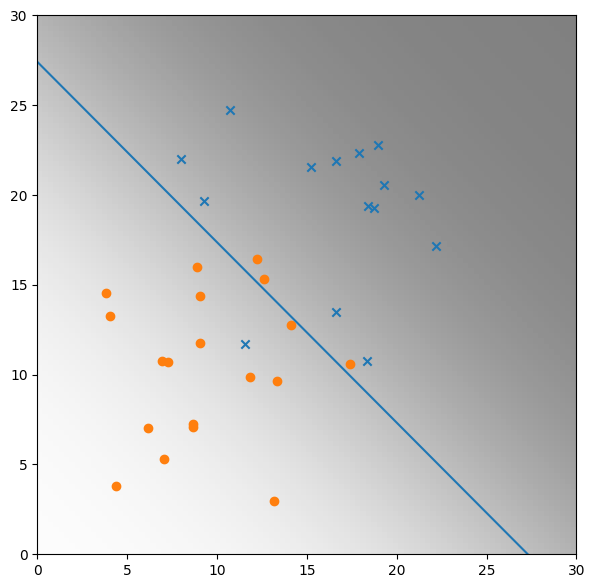

In [ ]:
[[w1], [w2]] , [b] = model.get_weights()

train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)
subplot.plot(xs, ys)

field = [[(1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))) for x1 in np.linspace(0, 30, 100)] for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30), vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)

In [ ]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 =600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1],ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]


In [ ]:
train_x = train_set[['x1','x2']].values
train_t = train_set['t'].values

test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values

In [ ]:
history = model.fit(train_x, train_t, validation_data=(test_x, test_t), batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - acc: 0.8982 - loss: 0.3425 - val_acc: 0.8964 - val_loss: 0.3343
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - acc: 0.9036 - loss: 0.3413 - val_acc: 0.9036 - val_loss: 0.3334
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - acc: 0.9062 - loss: 0.3395 - val_acc: 0.9071 - val_loss: 0.3327
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - acc: 0.9143 - loss: 0.3377 - val_acc: 0.9071 - val_loss: 0.3328
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.9161 - loss: 0.3363 - val_acc: 0.9107 - val_loss: 0.3335
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9214 - loss: 0.3357 - val_acc: 0.9143 - val_loss: 0.3349
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9232 - loss: 0.3358 - val_acc: 0.9214 - val_loss: 0.3366
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc: 0.9223 - loss: 0.3365 - val_acc: 0.9250 - val_loss: 0.3381
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.9205 - loss: 0.3372 

In [ ]:
history = model.fit(train_x, train_t, validation_data=(test_x, test_t), batch_size=len(train_x), epochs=5000, verbose=0)

<Axes: >

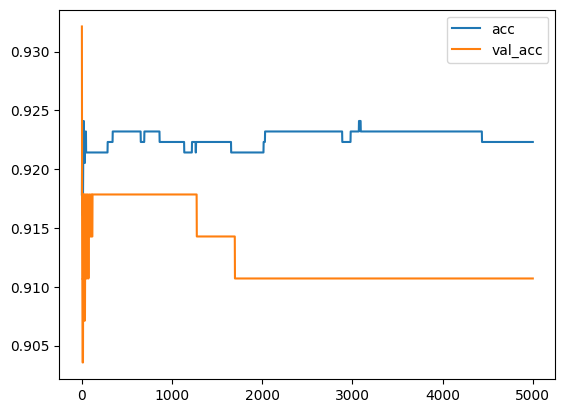

In [ ]:
DataFrame({'acc': history.history['acc'], 'val_acc': history.history['val_acc']}).plot()